# The influence factors of the number of visits to physician 

Healthcare policy has been a major point of discussion in the United States over the last decades. Especially, the effect of having health insurance on health decisions (expenditure and/or visits to a physician) is put into question. However,there could be more factors of infl uence on these decisions. This report aims in researching the influence factors of the number of visits to a physician.
In this report, the number of visits to a physician is assumed to be Poisson distributed, the estimation is obtained by Maximum Likelihood Estimation (MLE) and Newton-Raphson method.

The 2019 Medical Expenditure Panel Survey (MEPS) provides nationally representative estimates of health care use, expenditures, sources of payment, and health insurance coverage for the U.S. civilian non-institutionalised population. This research limits the data set to a sub-sample that contains only female individuals.

## Dependent and Explanatory Variable

The dependent variable is the number of visits to a physician, which is represented
as Y i for diff erent individuals. Followed by Shen (2013), the chosen explanatory
variables can be divided into three kinds: demographics, socioeconomic status,
and health-related characteristics.

The demographic variables include age, race (white, black, Asian, other), marital
status (married, others), region (mid-west, south, west, north east), family size
(1-2, 3-4, 5 and more), and insurance (insured, uninsured). Shen (2013) concluded
that having insurance heavily impacts health utilization; the number of visits is
increased when an individual is insured. In this research, as well as in Shen (2013),
it is assumed that the insurance status is an exogenous variable. Moreover, to ob-
serve the increasing or decreasing marginal eff ect of age on the number of visits to
3a physician, the square of age was also introduced.
The socioeconomic status variables are represented by the level of education and
the family income. Three dummy variables are also created for the level of educa-
tion: lower than high school, high school degree, bachelor and higher degree.
The health-related characteristics are described as whether they have a mental ill-
ness, whether they are currently smoking, and the number of comorbidities. The
variable ”COMOR” ( ”0”, ”1”, ”2 and more”) counts the number of following
health problems: high blood pressure, stroke, cancer, emphysema, high choles-
terol, diabetes, arthritis, coronary heart disease, angina, heart attack, and heart
disease.

In [1]:
import numpy as np
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import scipy as sc
from scipy.stats import norm
from scipy.stats import t

## Import Data

In [27]:
dtafile = 'C:\\Users\\Administrator\\Desktop\\ME\\H216.dta'
df, meta = pyreadstat.read_dta(dtafile)
df_subset = df[['OBDRV19','INSCOV19','PUB19X','SEX',
                'AGE19X','RACEV1X','MARRY19X','REGION19','EDUCYR','HIDEG','FAMS1231','FAMINC19',
                'MNHLTH31','ADSMOK42',
                'HIBPDX','CHDDX','ANGIDX','MIDX','OHRTDX','STRKDX','CANCERDX','EMPHDX','CHOLDX','DIABDX_M18','ARTHDX']].copy()

#choose the sample of females
df_subset = df_subset[df_subset['SEX'] ==2]

#add constant
df_subset["CONSTANT"] = 1

df_subset

,OBDRV19,INSCOV19,PUB19X,SEX,AGE19X,RACEV1X,MARRY19X,REGION19,EDUCYR,HIDEG,...,ANGIDX,MIDX,OHRTDX,STRKDX,CANCERDX,EMPHDX,CHOLDX,DIABDX_M18,ARTHDX,CONSTANT
1,1,1,2,2,42,2,1,2,14,3,...,2,2,2,2,2,2,2,2,2,1
2,1,1,2,2,16,2,5,2,9,8,...,-1,-1,-1,-1,-1,-1,-1,2,-1,1
3,2,2,1,2,72,1,1,1,14,3,...,2,2,2,2,2,2,2,2,2,1
5,0,3,2,2,46,1,3,3,12,3,...,2,2,2,2,2,2,2,2,2,1
9,4,2,1,2,79,1,2,1,12,3,...,2,2,2,2,2,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28503,1,1,2,2,10,1,6,3,3,8,...,-1,-1,-1,-1,-1,-1,-1,2,-1,1
28505,1,1,1,2,85,1,2,4,12,3,...,2,2,2,2,1,2,1,2,1,1
28507,0,3,2,2,59,2,5,2,13,7,...,2,2,1,2,2,2,2,2,1,1
28508,1,2,1,2,78,2,3,2,12,3,...,2,2,2,2,2,2,1,2,1,1


## Dependent Variable

### Number of visits to physician

<AxesSubplot:>

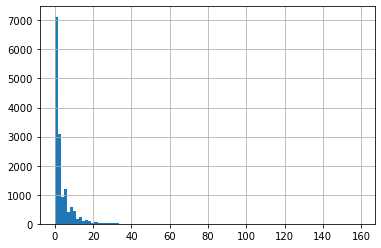

In [3]:
df_subset['OBDRV19'].hist(bins = 100)

In [4]:
print(df_subset['OBDRV19'].value_counts())

0      4502
1      2622
2      1878
3      1203
4       922
       ... 
104       1
114       1
39        1
69        1
54        1
Name: OBDRV19, Length: 74, dtype: int64


## Explanatory Variables

### 1. Insurance

In [5]:
print(df_subset['INSCOV19'].value_counts())

1    8702
2    5209
3     942
Name: INSCOV19, dtype: int64


1: any private  
2: public only  
3: uninsured  

In [6]:
#print(df_subset['PUB19X'].value_counts())

#Drop negative values
#df_subset = df_subset.drop(df_subset[df_subset['PUB19X'] < 0].index)

### 2. Age

Text(0, 0.5, 'Number of observations')

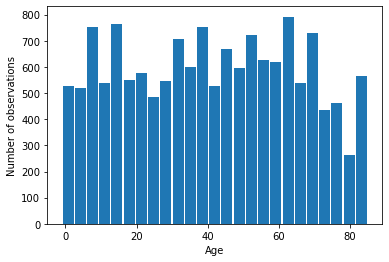

In [7]:
plt.hist(df_subset['AGE19X'],bins=25,rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Number of observations')

From the histogram of age above, it is clear that the age is equally distributed,
which implies that there no outlier needs to be deleted based on age.

Text(0, 0.5, 'Number of visits to physician')

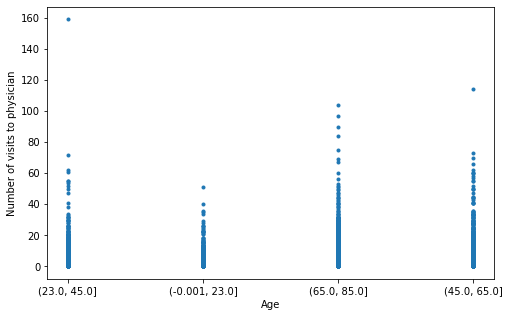

In [9]:
#drop negative values
df_subset = df_subset.drop(df_subset[df_subset['AGE19X'] < 0].index)

df_subset['age_bin']=pd.cut(df_subset['AGE19X'],[0,23,45,65,85],include_lowest=True)

fig,ax=plt.subplots(figsize=(8, 5))
ax.plot(df_subset['age_bin'].astype(str), df_subset['OBDRV19'], '.') 
#Matplotlib cannot plot category datatypes. need to convert to a string.
ax.set_xlabel('Age')
ax.set_ylabel('Number of visits to physician')

We can find people from 0-22,23-65,66-85 age groups show different mean values of number of visits to physicians.

### 3. Race

In [10]:
print(df_subset['RACEV1X'].value_counts())

1    10890
2     2364
4      837
6      519
3      139
Name: RACEV1X, dtype: int64


1: White  
2: Black  
3: Indian  
4: Asian  
6: Multiple races reported

### 4. Marital Status

In [11]:
print(df_subset['MARRY19X'].value_counts())

#Drop negative values
df_subset = df_subset.drop(df_subset[df_subset['MARRY19X'] < 0].index)

 1    5459
 5    3356
 6    2781
 3    1619
 2    1186
 4     346
-7       1
-8       1
Name: MARRY19X, dtype: int64


1: Married  
2-5: Others

### 5. Region

In [12]:
print(df_subset['REGION19'].value_counts())

#Drop negative values
df_subset = df_subset.drop(df_subset[df_subset['REGION19'] < 0].index)

3    5712
4    3758
2    3087
1    2190
Name: REGION19, dtype: int64


1: Northeast  
2: Midwest  
3: South  
4: West

### 6. Education

In [13]:
print(df_subset['HIDEG'].value_counts())

#Drop negative values and inapplicable results
df_subset = df_subset.drop(df_subset[df_subset['HIDEG'] < 0].index)
df_subset = df_subset.drop(df_subset[df_subset['HIDEG'] == 8].index)

 3    4728
 8    3051
 4    2101
 1    1823
 7    1191
 5    1165
 2     418
 6     192
-8      67
-7      11
Name: HIDEG, dtype: int64


1: No degree
2: GED
3: High School
4: Bachelor
5: Master
6: Doc
7: Other degree

### 7. Family size

In [14]:
print(df_subset['FAMS1231'].value_counts())

#Drop negative values
df_subset = df_subset.drop(df_subset[df_subset['FAMS1231'] < 0].index)


 2     3596
 1     2328
 3     1954
 4     1644
 5      933
-1      504
 6      415
 7      136
 8       72
 10      22
 9       14
Name: FAMS1231, dtype: int64


### 8. Family income

In [15]:
print(df_subset['FAMINC19'].value_counts())

#Drop negative values
df_subset = df_subset.drop(df_subset[df_subset['FAMINC19'] < 0].index)

0         319
30000      74
20000      61
15000      57
50000      57
         ... 
80050       1
349520      1
31261       1
59821       1
10474       1
Name: FAMINC19, Length: 6330, dtype: int64


### 9. Mental Health

In [16]:
print(df_subset['MNHLTH31'].value_counts())

#Drop negative values
df_subset = df_subset.drop(df_subset[df_subset['MNHLTH31'] < 0].index)

 1    3567
 2    3352
 3    2972
 4     853
 5     188
-1     166
-7       9
-8       4
Name: MNHLTH31, dtype: int64


 1:excellent,2: very good,3: good,4: fair, 5:
poor. 

### 10. Smoke

In [17]:
print(df_subset['ADSMOK42'].value_counts())

#Drop negative values
df_subset = df_subset.drop(df_subset[df_subset['ADSMOK42'] < 0].index)

 2    7394
 1    1776
-1    1762
Name: ADSMOK42, dtype: int64


1-smoke
2-don't smoke

### 11. Comorbidities 

To make our feauture set smaller, we want to create a feature for the total amount of comorbidities that someone has. We first remove the -8/-15 values, which indicate no answer/no answer recorded.

In [18]:
colNames = list(df_subset.columns)[:-1]
colNames
for i in range(12, len(colNames)-1):
    print(colNames[i])
    print(df_subset[colNames[i]].value_counts())
    df_subset = df_subset.drop(df_subset[df_subset[colNames[i]] < -1].index)

MNHLTH31
1    2966
2    2870
3    2473
4     710
5     151
Name: MNHLTH31, dtype: int64
ADSMOK42
2    7394
1    1776
Name: ADSMOK42, dtype: int64
HIBPDX
 2     5938
 1     3208
-15      22
-8        2
Name: HIBPDX, dtype: int64
CHDDX
 2    8794
 1     350
-8       2
Name: CHDDX, dtype: int64
ANGIDX
 2    8979
 1     164
-8       1
Name: ANGIDX, dtype: int64
MIDX
2    8870
1     273
Name: MIDX, dtype: int64
OHRTDX
2    8088
1    1055
Name: OHRTDX, dtype: int64
STRKDX
2    8728
1     415
Name: STRKDX, dtype: int64
CANCERDX
2    7918
1    1225
Name: CANCERDX, dtype: int64
EMPHDX
2    8958
1     185
Name: EMPHDX, dtype: int64
CHOLDX
 2    6225
 1    2917
-8       1
Name: CHOLDX, dtype: int64
DIABDX_M18
2    8004
1    1138
Name: DIABDX_M18, dtype: int64
ARTHDX
 2    6160
 1    2981
-8       1
Name: ARTHDX, dtype: int64


1:yes;2:no

In [19]:
#Create column that counts # of comorbidities

df_subset['high_pressure'] = pd.get_dummies(df_subset["HIBPDX"])[1]
df_subset['stroke'] = pd.get_dummies(df_subset["STRKDX"])[1]
df_subset['cancer'] = pd.get_dummies(df_subset["CANCERDX"])[1]
df_subset['emphysema'] = pd.get_dummies(df_subset["EMPHDX"])[1]
df_subset['high_cholesterol'] = pd.get_dummies(df_subset["CHOLDX"])[1]
df_subset['diabetes'] = pd.get_dummies(df_subset["DIABDX_M18"])[1]
df_subset['arthritis'] = pd.get_dummies(df_subset["ARTHDX"])[1]
df_subset["ch_dummy"] = pd.get_dummies(df_subset["CHDDX"])[1]
df_subset["angi_dummy"] = pd.get_dummies(df_subset["ANGIDX"])[1]
df_subset["mid_dummy"] = pd.get_dummies(df_subset["MIDX"])[1]
df_subset["ohrt_dummy"] = pd.get_dummies(df_subset["OHRTDX"])[1]
df_subset["heart_disease"] = df_subset[["ch_dummy", "angi_dummy", "mid_dummy","ohrt_dummy"]].max(axis=1)

df_subset["COMOR"] = df_subset[["stroke", "cancer", "emphysema","high_cholesterol",'diabetes','arthritis',"heart_disease" ]].sum(axis=1)

print(df_subset['COMOR'].value_counts())

0    4083
1    2098
2    1502
3     915
4     409
5     111
6      20
7       3
Name: COMOR, dtype: int64


In [20]:
# Using association_metrics library
import association_metrics as am
# Convert object columns to Category columns
df_disease=df_subset[['HIBPDX','CHDDX','ANGIDX','MIDX','OHRTDX','STRKDX','CANCERDX','EMPHDX','CHOLDX','DIABDX_M18','ARTHDX']]  
df_disease = df_disease.apply(lambda x: x.astype("category"))
# Initialize a CramersV object using the pandas.DataFrame (df)
cramers_v = am.CramersV(df_disease)
# It will return a pairwise matrix       filled with Cramer's V, where 
# columns and index are the categorical variables of the passed     # pandas.DataFrame
cfit = cramers_v.fit().round(2)
cfit

,HIBPDX,CHDDX,ANGIDX,MIDX,OHRTDX,STRKDX,CANCERDX,EMPHDX,CHOLDX,DIABDX_M18,ARTHDX
HIBPDX,1.00,0.21,0.14,0.16,0.21,0.19,0.16,0.07,0.42,0.30,0.35
CHDDX,0.21,1.00,0.30,0.50,0.28,0.19,0.07,0.13,0.18,0.14,0.17
ANGIDX,0.14,0.30,1.00,0.29,0.19,0.13,0.05,0.13,0.13,0.11,0.14
MIDX,0.16,0.50,0.29,1.00,0.17,0.19,0.05,0.12,0.14,0.14,0.15
OHRTDX,0.21,0.28,0.19,0.17,1.00,0.13,0.11,0.09,0.17,0.08,0.20
STRKDX,0.19,0.19,0.13,0.19,0.13,1.00,0.09,0.09,0.14,0.12,0.15
CANCERDX,0.16,0.07,0.05,0.05,0.11,0.09,1.00,0.06,0.14,0.06,0.21
EMPHDX,0.07,0.13,0.13,0.12,0.09,0.09,0.06,1.00,0.08,0.06,0.14
CHOLDX,0.42,0.18,0.13,0.14,0.17,0.14,0.14,0.08,1.00,0.31,0.33
DIABDX_M18,0.30,0.14,0.11,0.14,0.08,0.12,0.06,0.06,0.31,1.00,0.20


### Multicollinearity

In [28]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_subset.astype('float').values, i) for i in range(df_subset.shape[1])]
vif["features"] = df_subset.columns
print(vif)

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


    VIF Factor    features
0     1.163945     OBDRV19
1     1.328600    INSCOV19
2     1.383589      PUB19X
3     0.000000         SEX
4     3.495595      AGE19X
5     1.018081     RACEV1X
6     2.357824    MARRY19X
7     1.050823    REGION19
8     2.211477      EDUCYR
9     1.596206       HIDEG
10    1.408566    FAMS1231
11    1.382720    FAMINC19
12    1.127933    MNHLTH31
13    1.940536    ADSMOK42
14   14.053836      HIBPDX
15   55.105305       CHDDX
16   72.269260      ANGIDX
17  121.812957        MIDX
18   33.800289      OHRTDX
19   73.074534      STRKDX
20   25.681896    CANCERDX
21  120.278484      EMPHDX
22   13.595640      CHOLDX
23    1.131364  DIABDX_M18
24   15.535423      ARTHDX
25    0.000000    CONSTANT


In [ ]:
#What's vif
def variance_inflation_factor(exog, exog_idx):
    """
    exog : ndarray, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression
    exog_idx : int
        index of the exogenous variable in the columns of exog
    """
    k_vars = exog.shape[1]
    x_i = exog[:, exog_idx]
    mask = np.arange(k_vars) != exog_idx
    x_noti = exog[:, mask]
    r_squared_i = OLS(x_i, x_noti).fit().rsquared
    vif = 1. / (1. - r_squared_i)
    return vif

# or return series
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def variance_inflation_factors(exog_df):
    '''
    Parameters
    ----------
    exog_df : dataframe, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression.

    Returns
    -------
    vif : Series
        variance inflation factors
    '''
    exog_df = add_constant(exog_df)
    vifs = pd.Series(
        [1 / (1. - OLS(exog_df[col].values, 
                       exog_df.loc[:, exog_df.columns != col].values).fit().rsquared) 
         for col in exog_df],
        index=exog_df.columns,
        name='VIF'
    )
    return vifs

How to Interpret VIF Values\
The value for VIF starts at 1 and has no upper limit. A general rule of thumb for interpreting VIFs is as follows:\
A value of 1 indicates there is no correlation between a given explanatory variable and any other explanatory variables in the model.\
A value between 1 and 5 indicates moderate correlation between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention.\
A value greater than 5 indicates potentially severe correlation between a given explanatory variable and other explanatory variables in the model. In this case, the coefficient estimates and p-values in the regression output are likely unreliable.


## Outliers

We look for outliers in number of visits to physician with age, family size, family income and number of comorbidities. 

Text(0, 0.5, 'Number of visits to physician')

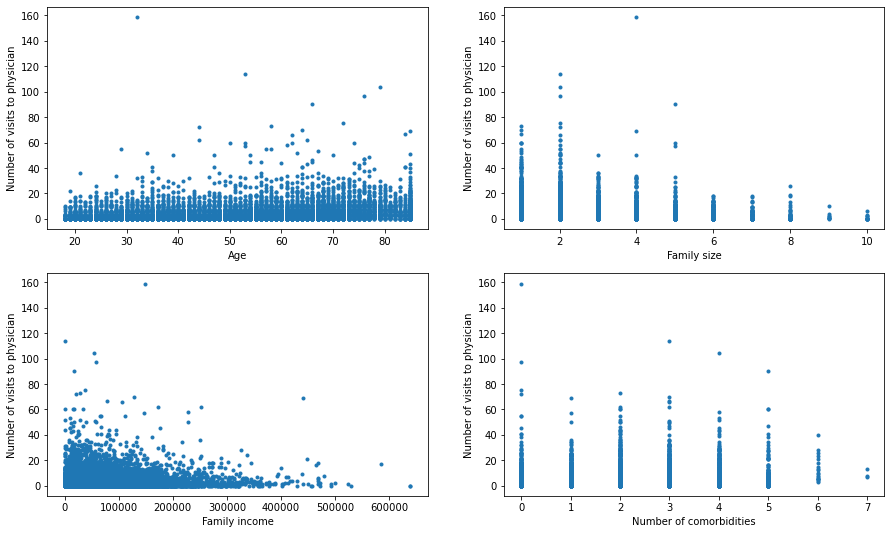

In [18]:
fig = plt.figure(figsize=(15, 9));

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# subplot 1
ax1.plot(df_subset['AGE19X'], df_subset['OBDRV19'], '.')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of visits to physician')

# subplot 2
ax2.plot(df_subset['FAMS1231'], df_subset['OBDRV19'], '.')
ax2.set_xlabel('Family size')
ax2.set_ylabel('Number of visits to physician')

# subplot 3
ax3.plot(df_subset['FAMINC19'], df_subset['OBDRV19'], '.')
ax3.set_xlabel('Family income')
ax3.set_ylabel('Number of visits to physician')

# subplot 4
ax4.plot(df_subset['COMOR'], df_subset['OBDRV19'], '.')
ax4.set_xlabel('Number of comorbidities')
ax4.set_ylabel('Number of visits to physician')

the individuals whose number of visits is larger than 100 are
considered as outliers. And also, the observations with a family income larger than
500000 and the number of comorbidities larger than 6 are also treated as outliers.
Moreover, all the negative variables in the data are deleted as they represent no
answer or inapplicable result. After this cleaning process, there are 8976 observations left.

In [80]:
df_subset = df_subset.drop(df_subset[df_subset['OBDRV19'] > 100].index)
df_subset = df_subset.drop(df_subset[df_subset['FAMS1231'] > 8].index)
df_subset = df_subset.drop(df_subset[df_subset['FAMINC19'] > 500000].index)
df_subset = df_subset.drop(df_subset[df_subset['COMOR'] > 6].index)
df_subset

,OBDRV19,INSCOV19,PUB19X,SEX,AGE19X,RACEV1X,MARRY19X,REGION19,EDUCYR,HIDEG,...,emphysema,high_cholesterol,diabetes,arthritis,ch_dummy,angi_dummy,mid_dummy,ohrt_dummy,heart_disease,COMOR
0,1,1,2,2,42,2,1,2,14,3,...,0,0,0,0,0,0,0,0,0,0
1,0,3,2,2,46,1,3,3,12,3,...,0,0,0,0,0,0,0,0,0,0
2,4,2,1,2,79,1,2,1,12,3,...,0,1,1,1,0,0,0,0,0,3
3,4,2,1,2,85,1,5,3,6,1,...,0,1,0,1,0,0,0,0,0,2
4,1,2,1,2,57,1,1,4,12,3,...,0,0,0,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,0,1,2,2,64,1,1,2,16,4,...,0,1,0,0,0,0,0,0,0,1
8972,1,1,1,2,85,1,2,4,12,3,...,0,1,0,1,0,0,0,0,0,3
8973,0,3,2,2,59,2,5,2,13,7,...,0,0,0,1,0,0,0,1,1,2
8974,1,2,1,2,78,2,3,2,12,3,...,0,1,0,1,0,0,0,0,0,2


## Define new variables and Create dummies

In [56]:
df_subset.reset_index(drop = True, inplace = True)

#Dependent variable
Y = pd.DataFrame()
Y['N']= df_subset['OBDRV19']

#Explanatory Variable
X = pd.DataFrame()

#Insured
X['INS'] = np.where(df_subset['INSCOV19'] == 3, 0, 1) #1 for convered by any insurance

#Age
X['AGE'] = df_subset['AGE19X'].copy()
X['AGE_sq']=np.power(df_subset['AGE19X'],2)

#Race
race_dummies      = pd.get_dummies(df_subset['RACEV1X'])  # using 'Indian' as reference
X['WHITE']  = race_dummies[1]
X['BLACK']  = race_dummies[2]
X['ASIAN'] = race_dummies[4]
X['MULTI']  = race_dummies[6]

#Marital status
X['MARRIED'] = np.where(df_subset['MARRY19X'] == 1, 1, 0) # 1 for get married

#Region
region_dummies = pd.get_dummies(df_subset['REGION19'])  # using north east as reference
X['MIDWEST'] = region_dummies[1]
X['SOUTH']   = region_dummies[2]
X['WEST']    = region_dummies[3]

#Education
#education_dummies = pd.get_dummies(df_subset['HIDEG'])  # using “less than or equal to 8th grade” as reference
X['HS-'] = np.where(df_subset['HIDEG'] < 3, 1, 0) # no high school degree
X['HS+'] = np.where(df_subset['HIDEG'] > 3, 1, 0) # bachelor and higher degree
#X['NO_HS'] = education_dummies[1]  #no high school
#X['GED'] = education_dummies[2] #GED
#X['HS'] = education_dummies[3] #high school degree
#X['B'] = education_dummies[4] #bechelor's degree
#X['M'] = education_dummies[5] #master's degree
#X['DOC'] = education_dummies[6] #doctorate degree

#Family Size
#merge catogories as 1-2, 3-4, >=5, use the last one as inference
X['FAM_SIZE_1and2'] = np.where(df_subset['FAMS1231'].isin([1,2]),1,0)
X['FAM_SIZE_3and4'] = np.where(df_subset['FAMS1231'].isin([3,4]),1,0)


#Family Income
X['FAM_INC'] = np.log(df_subset['FAMINC19']+1) 


#Mental health
X['MENTAL'] = np.where(df_subset['MNHLTH31'] > 3, 1, 0)  # dummy equal to 1 if have mental illness


#Smoke
X['SMOKE'] = np.where(df_subset['ADSMOK42'] == 1, 1, 0) #1 for currently smoking


#comorbidities
#X['COMOR'] = df_subset["COMOR"].copy()

X['COMOR_1'] = np.where(df_subset['COMOR']==1,1,0)
X['COMOR_>1'] = np.where(df_subset['COMOR']>1,1,0)


#Constant
X.insert(0,'CONSTANT',1)

In [57]:
X_matrix = X.to_numpy()
y_matrix = Y.to_numpy()

In [100]:
X.shape

(8976, 21)

In [140]:
X.describe()

,CONSTANT,INS,AGE,AGE_sq,WHITE,BLACK,ASIAN,MULTI,MARRIED,MIDWEST,...,WEST,HS-,HS+,FAM_SIZE_1and2,FAM_SIZE_3and4,FAM_INC,MENTAL,SMOKE,COMOR_1,COMOR_>1
count,8976.0,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,...,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000
mean,1.0,0.934046,51.269608,2959.937834,0.757910,0.151181,0.054144,0.027963,0.480392,0.146613,...,0.392045,0.158534,0.424577,0.571078,0.305704,10.557170,0.090798,0.192291,0.229278,0.322081
std,0.0,0.248215,18.204452,1904.721192,0.428372,0.358245,0.226315,0.164877,0.499643,0.353740,...,0.488234,0.365261,0.494306,0.494950,0.460731,2.004882,0.287337,0.394122,0.420392,0.467300
min,1.0,0.000000,18.000000,324.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,36.000000,1296.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10.138886,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.000000,52.000000,2704.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,10.915107,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,66.000000,4356.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,11.542494,0.000000,0.000000,0.000000,1.000000
max,1.0,1.000000,85.000000,7225.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,13.368154,1.000000,1.000000,1.000000,1.000000


## Model and Method

### Poisson Model

## large model

In [113]:
#Lambda
def lamb(beta,X): 
    return np.exp(X@beta) 

#Log-likelihood function
def log_likelihood(beta,X,y): 
    return np.sum(y*X@beta-lamb(beta,X)- np.log(sc.special.factorial(y)))

#Gradient
def gradient(beta,X, y): 
    return X.T@(y-lamb(beta,X))

#Hessian
def hessian(beta,X,y): 
    return -(lamb(beta,X)*X).T@X

In [126]:
#Newton-Raphson Method
max_iterations = 1000 #Maximum number of iterations
iSizeN, iSizeK = np.shape(X_matrix)
beta = np.zeros((iSizeK,1)) #Initial guess for coefficients

for i in range(max_iterations):
    beta_new = beta - np.dot(np.linalg.inv(hessian(beta,X_matrix,y_matrix)), gradient(beta,X_matrix,y_matrix)) #Updating
    
#Stopping criteria
    if np.sum(np.absolute(beta-beta_new)) < 1e-12:
        # Update beta
        beta = beta_new
        break
    beta = beta_new   

In [127]:
#calculate se,p_value
#QML (only assume correct specification of the conditional mean,allow data not be poisson distributed)
var_y=(y_matrix-lamb(beta,X_matrix))**2
B=(var_y*X_matrix).T@X_matrix
A=hessian(beta,X_matrix,y_matrix)
se_qml=np.sqrt(np.diag(np.linalg.inv(A)@B@np.linalg.inv(A)))
tstat_qml=np.squeeze(beta)/se_qml
pvalue_qml=sc.stats.norm.sf(np.abs(tstat_qml))*2

#standard ML (assume poisson regression is parametrically correctly specified)
se_ml=np.sqrt(np.diag(np.linalg.inv(-A)))
tstat_ml=np.squeeze(beta)/se_ml
pvalue_ml=sc.stats.norm.sf(np.abs(tstat_ml))*2

In [128]:
variables=X.columns
table_poisson=pd.DataFrame({"Variable":variables,"Estimate":np.squeeze(beta),"SE_ml":se_ml,"t-stat_ml":tstat_ml,"p-value_ml":pvalue_ml,
                           "SE_qml":se_qml,"t-stat_qml":tstat_qml,"p-value_qml":pvalue_qml})
table_poisson = table_poisson.round(4)
table_poisson

,Variable,Estimate,SE_ml,t-stat_ml,p-value_ml,SE_qml,t-stat_qml,p-value_qml
0,CONSTANT,-0.6222,0.0893,-6.9685,0.0000,0.2695,-2.3083,0.0210
1,INS,1.3083,0.0446,29.3197,0.0000,0.0927,14.1106,0.0000
2,AGE,0.0040,0.0019,2.1403,0.0323,0.0053,0.7643,0.4447
3,AGE_sq,0.0000,0.0000,1.6363,0.1018,0.0000,0.5651,0.5720
4,WHITE,-0.0480,0.0557,-0.8616,0.3889,0.1784,-0.2690,0.7879
5,BLACK,-0.1595,0.0570,-2.8001,0.0051,0.1840,-0.8670,0.3860
6,ASIAN,-0.2301,0.0612,-3.7608,0.0002,0.1949,-1.1805,0.2378
7,MULTI,-0.0312,0.0626,-0.4980,0.6185,0.1945,-0.1603,0.8726
8,MARRIED,-0.0203,0.0110,-1.8409,0.0656,0.0334,-0.6069,0.5439
9,MIDWEST,0.0643,0.0163,3.9445,0.0001,0.0481,1.3348,0.1819


## small model

In [95]:
X_small=X[['INS',
           'COMOR_1','COMOR_>1',
          'HS-','HS+']]
X_small.insert(0,'CONSTANT',1)
X_small_matrix = X_small.to_numpy()

In [96]:
max_iterations = 1000 #Maximum number of iterations
iSizeN, iSizeK = np.shape(X_small_matrix)
beta = np.zeros((iSizeK,1)) #Initial guess for coefficients

for i in range(max_iterations):
    beta_new = beta - np.dot(np.linalg.inv(hessian(beta,X_small_matrix,y_matrix)), gradient(beta,X_small_matrix,y_matrix)) #Updating
    
#Stopping criteria
    if np.sum(np.absolute(beta-beta_new)) < 1e-12:
        # Update beta
        beta = beta_new
        break
    beta = beta_new   

In [97]:
#calculate se,p_value
#QML (only assume correct specification of the conditional mean,allow data not be poisson distributed)
var_y=(y_matrix-lamb(beta,X_small_matrix))**2
B=(var_y*X_small_matrix).T@X_small_matrix
A=hessian(beta,X_small_matrix,y_matrix)
se_qml=np.sqrt(np.diag(np.linalg.inv(A)@B@np.linalg.inv(A)))
tstat_qml=np.squeeze(beta)/se_qml
pvalue_qml=sc.stats.norm.sf(np.abs(tstat_qml))*2

#standard ML (assume poisson regression is parametrically correctly specified)
se_ml=np.sqrt(np.diag(np.linalg.inv(-A)))
tstat_ml=np.squeeze(beta)/se_ml
pvalue_ml=sc.stats.norm.sf(np.abs(tstat_ml))*2

In [98]:
variables=X_small.columns
table_poisson=pd.DataFrame({"Variable":variables,"Estimate":np.squeeze(beta),"SE_ml":se_ml,"t-stat_ml":tstat_ml,"p-value_ml":pvalue_ml,
                           "SE_qml":se_qml,"t-stat_qml":tstat_qml,"p-value_qml":pvalue_qml})
table_poisson = table_poisson.round(4)
table_poisson

,Variable,Estimate,SE_ml,t-stat_ml,p-value_ml,SE_qml,t-stat_qml,p-value_qml
0,CONSTANT,-0.4207,0.0447,-9.4127,0.0,0.0935,-4.5015,0.0000
1,INS,1.3548,0.0444,30.5278,0.0,0.0918,14.7647,0.0000
2,COMOR_1,0.5441,0.0147,37.0729,0.0,0.0434,12.5384,0.0000
3,COMOR_>1,1.1195,0.0122,91.4662,0.0,0.0405,27.6209,0.0000
4,HS-,-0.1208,0.0153,-7.8872,0.0,0.0477,-2.5338,0.0113
5,HS+,0.0883,0.0107,8.2659,0.0,0.0335,2.6324,0.0085


#### Interpretation of Poisson Model

First, the insurance, education level, and comorbidities dummy variables are used
as explanatory variables in the least complex model. Intuitively these should be
key factors infl uencing the number of visits to physicians, because insurance aff ects
people’s willingness to see a physician. The education level refl ects people’s social-
economic characteristics and risk awareness for physical conditions. The number
of health conditions determines whether a person needs to see a doctor.

From the results, it can be seen that all these variables are signifi cant on a 0.05 level, so they sig-
nifi cantly aff ect the number of visits to physicians.

To be more specifi c, compared with people having no comorbidities, people with
one comorbidity have a 0.5441 higher mean value of visits number, and people
having more than one comorbidity have a 1.1195 higher mean value. In addi-
tion, from the sign of ”HS-” and ”HS+”, we can argue that as the education level
increases, people are more likely to visit physicians. This is because higher edu-
cation level leads to the ability to have better insurance packages or to aff ord the
cost of visiting doctors, but this has much smaller eff ect on dependent variable
than health condition has. Apart from this, insurance has a substantial impact on
number of visits, people who do not have an insurance very likely cannot aff ord
the cost of seeing a doctor, so they will tend to reduce the number of their visits
to physicians, as shown in the table, people having insurance have higher average
number of visits than people not having insurance.

However, it is clear that there are many more variables that can eff ect the number
of visits, so a model with more control variables is built. The variables of major
interest are insurance, education level, mental health status, smoking, and the number of comorbidities.

### Interpretation of coefficients (Marginal effect)

In [131]:
np.squeeze(beta)*np.mean(y_matrix)

array([-2.84666291e+00,  5.98572608e+00,  1.84649093e-02,  1.24203218e-04,
       -2.19580553e-01, -7.29958651e-01, -1.05272272e+00, -1.42654416e-01,
       -9.28224575e-02,  2.93979954e-01,  3.51134857e-02,  5.54247357e-01,
       -7.10672983e-01,  4.64733167e-01,  6.02201980e-01,  3.31799608e-01,
       -1.50332985e-02,  1.85013783e+00, -5.10707488e-01,  1.85685646e+00,
        3.96883484e+00])

### Overdispersion

In [29]:
print(Y.describe())
Y.value_counts()/np.shape(Y)[0]

                 N
count  8990.000000
mean      4.516018
std       6.562443
min       0.000000
25%       0.000000
50%       2.000000
75%       6.000000
max      75.000000


N 
0     0.253393
1     0.151057
2     0.118799
3     0.084427
4     0.068632
        ...   
53    0.000111
51    0.000111
42    0.000111
49    0.000111
75    0.000111
Length: 65, dtype: float64

We can observe that about 25% of the observations are zeros, and variance greatly exceeds the mean (along with long right tails), so we can infer that the counts are overdispersed. If the conditional mean is correctly specified, the Poisson MLE is still consistent under
overdispersion, but standard error would be deflated, and t-statistics would be inflated. It can be seen in the table above, there are more significant estimators using standard ML variance matrix than using robust variance matrix.

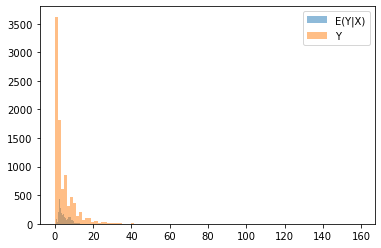

In [117]:
plt.hist(lamb(beta,X_matrix),alpha=0.5,bins=100,label='E(Y|X)')
plt.hist(Y,alpha=0.5,bins=100,label='Y')
plt.legend()
plt.show()

In the figure above, the histogram of the actual and estimated number of visits to
a physician is plotted. This shows that there are more zeros in the data than pre-
dicted by the Poisson model, besides the variance is greater than the expectation.
So, Poisson model is not the best fit for this data set.

To solve the the problem of excess zeros, we can try Hurdle model.

In [102]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [103]:
def loglikelihood1_hurdle(beta,X,y):
    D=np.where(y>0,1,0)
    return np.sum((1-D)*np.log(sigmoid(X@beta))-D*np.log(lamb(beta,X)+1))

In [104]:
def loglikelihood2_hurdle(beta,X,y):
    D=np.where(y>0,1,0)
    return np.sum((y*X@beta-np.log(np.exp(lamb(beta,X))-1))*D- np.log(sc.special.factorial(y)))

In [105]:
def gradient1(beta,X,y):
    D=np.where(y>0,1,0)
    return X.T@((1-D)/(1+lamb(beta,X))-D*sigmoid(X@beta))

In [106]:
def hessian1(beta,X,y):
    D=np.where(y>0,1,0)
    return (((D-1)*lamb(beta,X)/(1+lamb(beta,X))**2-D*(1-sigmoid(X@beta)))*X).T@X

In [107]:
def gradient2(beta,X,y):
    D=np.where(y>0,1,0)  
    ee=np.exp(-lamb(beta,X))
    return X.T@(D*(y - lamb(beta,X)/(1-ee))) 

def hessian2(beta,X,y):
    D=np.where(y>0,1,0)
    ee=np.exp(-lamb(beta,X))
    de=(1-ee)**2
    nu=lamb(beta,X)*(1-ee)-ee*lamb(2*beta,X)
    return -(D*nu/de*X).T@X
    

In [132]:
max_iterations = 1000 #Maximum number of iterations
iSizeN, iSizeK = np.shape(X_small_matrix)
beta1 = np.zeros((iSizeK,1)) #Initial guess for coefficients
beta2 = np.zeros((iSizeK,1))
for i in range(max_iterations):
    beta1_new = beta1 - np.dot(np.linalg.inv(hessian1(beta1,X_small_matrix,y_matrix)), gradient1(beta1,X_small_matrix,y_matrix)) #Updating
#Stopping criteria
    if np.sum(np.absolute(beta1-beta1_new)) < 1e-12:
        # Update beta
        beta1 = beta1_new
        break
    beta1 = beta1_new

for i in range(max_iterations):
    beta2_new = beta2 - np.dot(np.linalg.inv(hessian2(beta2,X_small_matrix,y_matrix)), gradient2(beta2,X_small_matrix,y_matrix))
#Stopping criteria
    if np.sum(np.absolute(beta2-beta2_new)) < 1e-12:
        # Update beta
        beta2 = beta2_new
        break
    beta2 = beta2_new

In [133]:
variables=X_small.columns
table_hurdle=pd.DataFrame({"variable":variables,"beta1":np.squeeze(beta1),"beta2":np.squeeze(beta2)})
table_hurdle.round(4)

,variable,beta1,beta2
0,CONSTANT,1.0971,0.6020
1,INS,-1.5674,0.7828
2,COMOR_1,-0.9812,0.2974
3,COMOR_>1,-1.9322,0.7576
4,HS-,0.2819,-0.0737
5,HS+,-0.2911,0.0430


In [118]:
BIC_hurdle=np.log(iSizeN)*2*iSizeK-2*(loglikelihood1_hurdle(beta1,X_matrix,y_matrix)+loglikelihood2_hurdle(beta2,X_matrix,y_matrix))
BIC_poisson=np.log(iSizeN)*iSizeK-2*log_likelihood(beta,X_matrix,y_matrix)
AIC_hurdle=2*2*iSizeK-2*(loglikelihood1_hurdle(beta1,X_matrix,y_matrix)+loglikelihood2_hurdle(beta2,X_matrix,y_matrix))
AIC_poisson=2*iSizeK-2*log_likelihood(beta,X_matrix,y_matrix)

In [119]:
log_likelihood(beta,X_matrix,y_matrix)

-35404.537266009545

We can also use negative bionomial model(also to account for overdispersion)

In [134]:
from scipy.special import gammaln

def log_likelihood_nb(beta,alpha, X, y):

    mu = np.exp(X @ beta.reshape(-1,1))
    r = 1/alpha
    loglikelihood=np.sum(gammaln(y + r) - gammaln(r) - gammaln(y + 1) - r * np.log(1 + mu/r) + y * np.log(mu / (r + mu)))
    
    return loglikelihood


In [135]:
def gradient_nb(beta,alpha,X,y):
    mu=np.exp(X@beta)
    return X.T@((y-mu)/(1+alpha*mu)**2)

def hessian_nb(beta,alpha,X,y):
    mu=np.exp(X@beta)
    return -((mu*(1+alpha*y)/(1+alpha*mu)**2)*X).T@X

In [136]:
max_iterations = 1000 #Maximum number of iterations
iSizeN, iSizeK = np.shape(X_matrix)
beta3 = np.zeros((iSizeK,1)) #Initial guess for coefficients
alpha_range=np.arange(0.1,10,0.1)
ll=np.zeros(len(alpha_range))

In [137]:
lll=[]

In [138]:
for i,alpha in enumerate(alpha_range):
    
    for s in range(max_iterations):
        beta3_new = beta3 - np.dot(np.linalg.inv(hessian_nb(beta3,alpha,X_matrix,y_matrix)), gradient_nb(beta3,alpha,X_matrix,y_matrix)) #Updating
    #Stopping criteria
        if np.sum(np.absolute(beta3-beta3_new)) < 1e-12:
            # Update beta
            beta3 = beta3_new
            break
        beta3 = beta3_new
        ll[i]=log_likelihood_nb(beta3,alpha,X_matrix,y_matrix)
        lll.append(beta3)
    
    

In [139]:
#estimator
lll[np.argmax(ll)]

array([[-7.30472333e-01],
       [ 1.29398072e+00],
       [-5.98592864e-04],
       [ 7.66592966e-05],
       [ 6.54763248e-02],
       [-4.19154055e-02],
       [-1.64943216e-01],
       [ 4.52696182e-02],
       [ 7.91827103e-03],
       [ 5.62533574e-02],
       [ 8.02162740e-03],
       [ 1.02239687e-01],
       [-1.40700929e-01],
       [ 1.00738216e-01],
       [ 1.38869045e-01],
       [ 9.15835859e-02],
       [ 3.63228127e-03],
       [ 4.64709809e-01],
       [-6.77829402e-02],
       [ 4.08783718e-01],
       [ 8.62844867e-01]])

In [143]:
AIC_nb=2*iSizeK-2*np.max(ll)
BIC_nb=np.log(iSizeN)*iSizeK-2*np.max(ll)

In [144]:
"""
from scipy.optimize import minimize

params0=np.zeros(iSizeK+1)
result = minimize(negative_binomial_log_likelihood, x0=params0, args=(X_matrix, y_matrix), method='BFGS')
params = result.x
beta_est = params[:-1]
alpha_est = np.exp(params[-1])
"""

"\nfrom scipy.optimize import minimize\n\nparams0=np.zeros(iSizeK+1)\nresult = minimize(negative_binomial_log_likelihood, x0=params0, args=(X_matrix, y_matrix), method='BFGS')\nparams = result.x\nbeta_est = params[:-1]\nalpha_est = np.exp(params[-1])\n"

In [145]:
table2=pd.DataFrame([[AIC_poisson,AIC_hurdle,AIC_nb],[BIC_poisson,BIC_hurdle,BIC_nb]],
                    columns=['poisson','hurdle','nb'],index=['AIC','BIC'])
table2

,poisson,hurdle,nb
AIC,70851.074532,63479.549787,44441.879989
BIC,71000.223034,63777.846791,44591.028491


In [141]:
X.describe()

,CONSTANT,INS,AGE,AGE_sq,WHITE,BLACK,ASIAN,MULTI,MARRIED,MIDWEST,...,WEST,HS-,HS+,FAM_SIZE_1and2,FAM_SIZE_3and4,FAM_INC,MENTAL,SMOKE,COMOR_1,COMOR_>1
count,8976.0,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,...,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000
mean,1.0,0.934046,51.269608,2959.937834,0.757910,0.151181,0.054144,0.027963,0.480392,0.146613,...,0.392045,0.158534,0.424577,0.571078,0.305704,10.557170,0.090798,0.192291,0.229278,0.322081
std,0.0,0.248215,18.204452,1904.721192,0.428372,0.358245,0.226315,0.164877,0.499643,0.353740,...,0.488234,0.365261,0.494306,0.494950,0.460731,2.004882,0.287337,0.394122,0.420392,0.467300
min,1.0,0.000000,18.000000,324.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,36.000000,1296.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10.138886,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.000000,52.000000,2704.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,10.915107,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,66.000000,4356.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,11.542494,0.000000,0.000000,0.000000,1.000000
max,1.0,1.000000,85.000000,7225.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,13.368154,1.000000,1.000000,1.000000,1.000000


## Conclusion

The results suggest that insurance, comorbidities, mental state, education level,
and smoking signifi cantly infl uence the number of visits to a physician. Hence, for
policy-making, it is important to consider these factors. Improving social insurance
rate, encouraging education and raising people’s mental satisfaction are something
the government can do to improve the health state of residents.

In this research, the number of visits to a physician was assumed to be Poisson
distributed. A shortcoming of the Poisson distribution is that the model, in this
case, predicts too few zero values than actually occur. For this reason, the Hurdle
model was introduced. Unfortunately, the signifi cance of the results could not be
reported. Therefore, it is hard to tell if this model actually gives diff erent results
or if this model performs better. Based on the AIC and BIC values, the Hurdle
model is better fi tting than the Poisson model. The NB2 model seems to fi t our
data set the best. In a follow-up research, this model should be analyzed more
thoroughly.